In [1]:
import seaborn as sns
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd 
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = sns.load_dataset('titanic')

In [3]:
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [5]:
data.drop(columns=['class', 'who','adult_male','embark_town','alive','deck'],inplace=True)

In [6]:
data

,survived,pclass,sex,age,sibsp,parch,fare,embarked,alone
0,0,3,male,22.0,1,0,7.2500,S,False
1,1,1,female,38.0,1,0,71.2833,C,False
2,1,3,female,26.0,0,0,7.9250,S,True
3,1,1,female,35.0,1,0,53.1000,S,False
4,0,3,male,35.0,0,0,8.0500,S,True
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,True
887,1,1,female,19.0,0,0,30.0000,S,True
888,0,3,female,NaN,1,2,23.4500,S,False
889,1,1,male,26.0,0,0,30.0000,C,True


In [7]:
num =data.select_dtypes(include=['int','float']).columns

In [8]:
num

Index(['survived', 'pclass', 'age', 'sibsp', 'parch', 'fare'], dtype='object')

In [9]:
cate =data.select_dtypes(include=['object']).columns


In [10]:
cate

Index(['sex', 'embarked'], dtype='object')

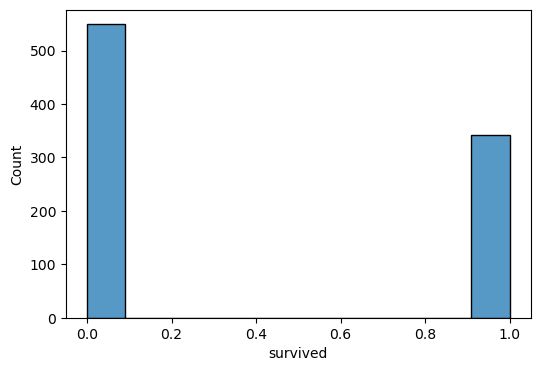

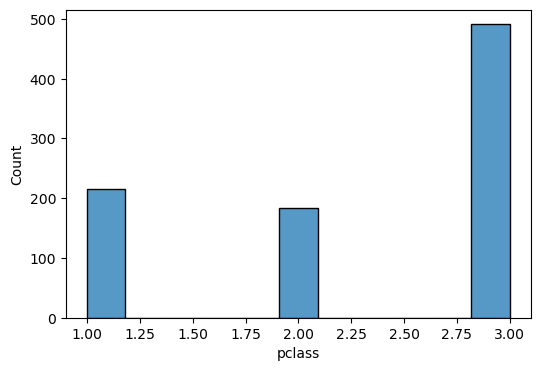

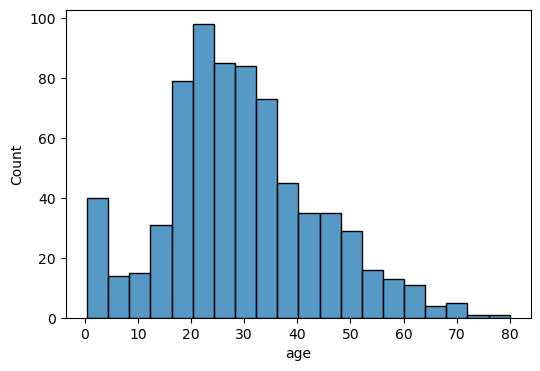

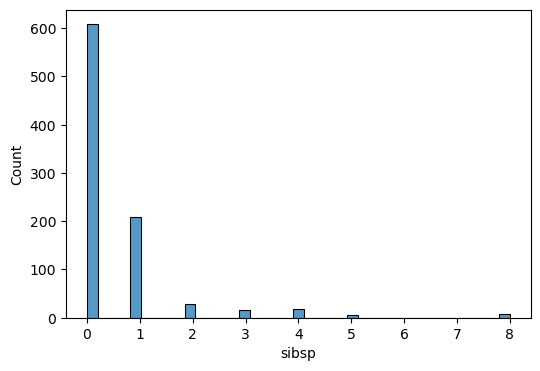

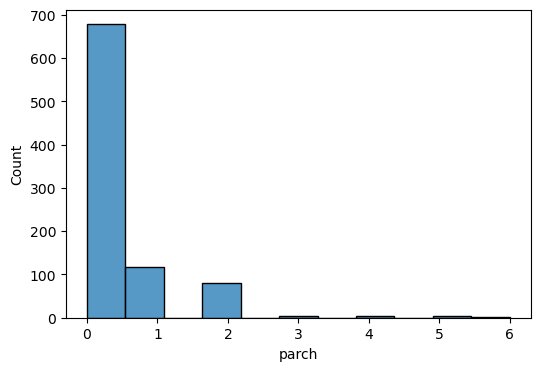

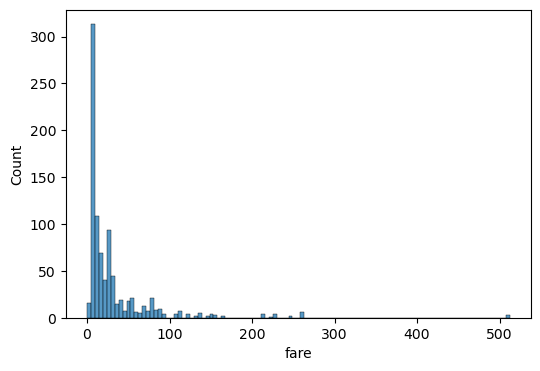

In [11]:
for i in num:
    plt.figure(figsize=(6,4))
    sns.histplot(x=data[i])

In [12]:
data['age'].replace(np.nan,data['age'].mean(),inplace=True)

In [13]:
data.sort_values(by='age')

,survived,pclass,sex,age,sibsp,parch,fare,embarked,alone
803,1,3,male,0.42,0,1,8.5167,C,False
755,1,2,male,0.67,1,1,14.5000,S,False
644,1,3,female,0.75,2,1,19.2583,C,False
469,1,3,female,0.75,2,1,19.2583,C,False
831,1,2,male,0.83,1,1,18.7500,S,False
...,...,...,...,...,...,...,...,...,...
116,0,3,male,70.50,0,0,7.7500,Q,True
96,0,1,male,71.00,0,0,34.6542,C,True
493,0,1,male,71.00,0,0,49.5042,C,True
851,0,3,male,74.00,0,0,7.7750,S,True


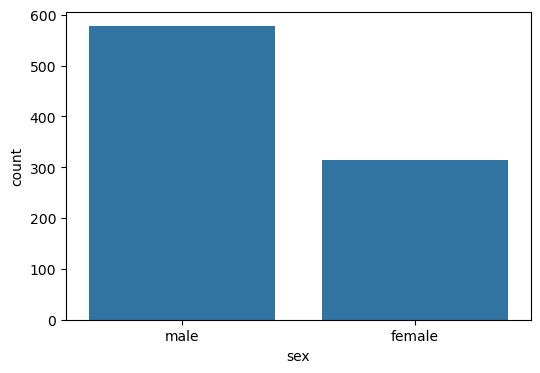

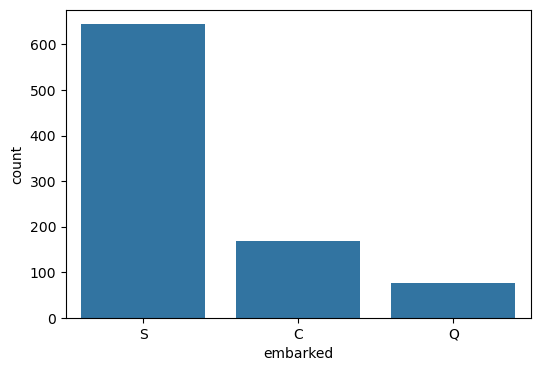

In [14]:
for i in cate:
    plt.figure(figsize=(6,4))
    sns.countplot(x=data[i])

In [15]:
data.dropna(inplace=True)

In [16]:
data['sex']=data['sex'].map({'male':1,'female':0})

In [17]:
data['embarked']=data['embarked'].map({'C': 0,'S': 1,'Q':2})

In [18]:
data['alone']=data['alone'].astype(int)

In [19]:
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,alone
0,0,3,1,22.0,1,0,7.2500,1,0
1,1,1,0,38.0,1,0,71.2833,0,0
2,1,3,0,26.0,0,0,7.9250,1,1
3,1,1,0,35.0,1,0,53.1000,1,0
4,0,3,1,35.0,0,0,8.0500,1,1


In [20]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
new=['age','fare','parch']

In [21]:
data[new]=ss.fit_transform(data[new])

In [22]:
x= data.drop(columns='survived')
y= data['survived']

In [23]:
x,y

(     pclass  sex       age  sibsp     parch      fare  embarked  alone
 0         3    1 -0.590495      1 -0.474326 -0.500240         1      0
 1         1    0  0.643971      1 -0.474326  0.788947         0      0
 2         3    0 -0.281878      0 -0.474326 -0.486650         1      1
 3         1    0  0.412509      1 -0.474326  0.422861         1      0
 4         3    1  0.412509      0 -0.474326 -0.484133         1      1
 ..      ...  ...       ...    ...       ...       ...       ...    ...
 886       2    1 -0.204724      0 -0.474326 -0.384475         1      1
 887       1    0 -0.821957      0 -0.474326 -0.042213         1      1
 888       3    0  0.003524      1  2.006119 -0.174084         1      0
 889       1    1 -0.281878      0 -0.474326 -0.042213         0      1
 890       3    1  0.181046      0 -0.474326 -0.490173         2      1
 
 [889 rows x 8 columns],
 0      0
 1      1
 2      1
 3      1
 4      0
       ..
 886    0
 887    1
 888    0
 889    1
 890    0

In [24]:
from sklearn.model_selection import train_test_split

In [305]:
 X_train, X_test, y_train, y_test = train_test_split( x, y, test_size=0.33, random_state=42)
from sklearn.linear_model import Perceptron

In [26]:
p =Perceptron(random_state=4,alpha=0.01)
p.fit(X_train,y_train)

Perceptron(alpha=0.01, random_state=4)

In [27]:
p.score(X_test,y_test)

0.782312925170068

In [28]:
p.score(X_train,y_train)

0.7932773109243697

In [29]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [30]:
pred = p.predict(X_test)
confusion_matrix(y_test,pred)

array([[142,  44],
       [ 20,  88]], dtype=int64)

In [99]:
x

,pclass,sex,age,sibsp,parch,fare,embarked,alone
0,3,1,-0.590495,1,-0.474326,-0.500240,1,0
1,1,0,0.643971,1,-0.474326,0.788947,0,0
2,3,0,-0.281878,0,-0.474326,-0.486650,1,1
3,1,0,0.412509,1,-0.474326,0.422861,1,0
4,3,1,0.412509,0,-0.474326,-0.484133,1,1
...,...,...,...,...,...,...,...,...
886,2,1,-0.204724,0,-0.474326,-0.384475,1,1
887,1,0,-0.821957,0,-0.474326,-0.042213,1,1
888,3,0,0.003524,1,2.006119,-0.174084,1,0
889,1,1,-0.281878,0,-0.474326,-0.042213,0,1


In [31]:
x.shape

(889, 8)

In [32]:
import tensorflow

In [307]:
from keras.layers import Dense,BatchNormalization,Dropout
from keras.models import Sequential
from keras.callbacks import EarlyStopping
from keras.regularizers import l1 ,L2

In [309]:
ann =Sequential()

In [336]:
ann.add(Dense(6,input_dim =8, activation='relu'))
ann.add(Dense(5, activation='relu'))
ann.add(Dense(4, activation='relu'))
ann.add(Dense(2, activation='relu'))
ann.add(Dense(1, activation='sigmoid'))

In [338]:
ann.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [370]:
ann.fit(X_train,y_train,batch_size=30,epochs=50,validation_data=(X_test,y_test),callbacks=EarlyStopping()) 

Epoch 1/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8454 - loss: 0.4080 - val_accuracy: 0.8061 - val_loss: 0.4487
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.8487 - loss: 0.4104 - val_accuracy: 0.7959 - val_loss: 0.4479
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.8353 - loss: 0.4121 - val_accuracy: 0.7993 - val_loss: 0.4374
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8487 - loss: 0.4030 - val_accuracy: 0.8027 - val_loss: 0.4423


In [372]:
from sklearn.metrics import accuracy_score

In [374]:
predd=ann.predict(X_test)
data_pred =[]
for i in predd:
    if i[0]>0.5:
        data_pred.append(1)
    else: 
        data_pred.append(0)
    

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


In [376]:
accuracy_score(y_test,data_pred)

0.8027210884353742

In [378]:
 predd1=ann.predict(X_train)
data_pred1 =[]
for i in predd1:
    if i[0]>0.5:
        data_pred1.append(1)
    else: 
        data_pred1.append(0)

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


In [380]:
accuracy_score(y_train,data_pred1)

0.8571428571428571

In [382]:
train_acc=ann.history.history['accuracy']
test_acc=ann.history.history['val_accuracy']

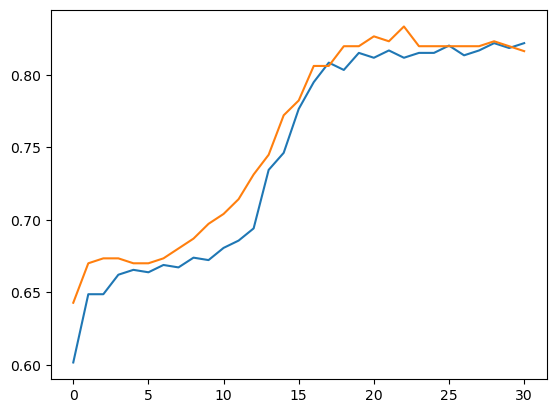

In [329]:
plt.plot(train_acc)
plt.plot(test_acc)